In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [73]:
def plot_learning_average(env_name, ax, experiment, window_size, var = True, OnePlayer = False):
    if OnePlayer:
        base_dir = os.getcwd() + '/models_OnePlayer/' + env_name
    else:
        base_dir = os.getcwd() + '/models_TwoPlayer/' + env_name
    results = {}
        
    for exp in experiment:
        results[exp] = {}
        for seed in range(1):
            try:
                if(OnePlayer):
                    results[exp][seed] = np.load(base_dir + '/' + exp +'/alpha_0.0/' + str(seed) + '/results.npy')
                else:
                    results[exp][seed] = np.load(base_dir + '/' + exp +'/alpha_0.1/' + str(seed) + '/results.npy')   
            except IOError:
                print("No Files found")
            
    plot_learning_curves(results, ax, env_name, window_size, var, OnePlayer, best = False)

def plot_learning_best(env_name, seed, ax, experiment, window_size, var = True, OnePlayer = False):
    if OnePlayer:
        base_dir = os.getcwd() + '/models_OnePlayer/' + env_name
    else:
        base_dir = os.getcwd() + '/models/' + env_name
    results = {}
        
    for i, exp in enumerate(experiment):
        results[exp] = {}
        try:
            if(OnePlayer):
                results[exp][seed] = np.load(base_dir + '/' + exp +'/alpha_0.0/' + str(seed) + '/results.npy')
            else:
                results[exp][seed] = np.load(base_dir + '/' + exp +'/alpha_0.1/' + str(seed) + '/results.npy')              
        except IOError:
            pass
            
    plot_learning_curves(results, ax, env_name, window_size, var, OnePlayer, best = True)

def plot_learning_curves(results, ax, env_name, window_size, var, OnePlayer, best):    
    colors = ['#396ab1', '#3e9651', '#cc2529', '#da7c30', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
    idx = 0
    for exp in results:
        for seed in results[exp]:
            data = results[exp][seed]
            x = np.linspace(0, 5e3*(len(data)-1), len(data))
#             x = np.linspace(0, 1e6, 201)
            if 'RMSprop' in exp:
                l = 'GAD(RMSprop)'
            elif 'ExtraAdam' in exp:
                l = 'Extra-Adam'
            else:
                l = 'MixedNE-LD(RMSProp)' 
            ax.plot(x, data.tolist(), color = colors[idx], label = exp)
        idx += 1  
    
    ax.set_title(env_name)    
    ax.set_xlabel('Timesteps')
    ax.set_ylabel('Reward')
    ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))    

In [74]:
def plot_learning_all(experiment, title, comparison, OnePlayer, best, seed=None):
    cols = 1
    rows = 1
    envs = ['HalfCheetah-v2']
    fill = [False]
    for f in fill:
        fig, axs = plt.subplots(rows, cols, figsize=(20*cols/3, 9*rows/2))
        for i, env in enumerate(envs):
            ax = axs
#             ax = axs.flatten()[i]
            if(comparison):
                exp = experiment[i]
            else:
                exp = experiment
            if(best):
                plot_learning_best(env, seed[i], ax, exp, window_size = 3000, var = f, OnePlayer = OnePlayer)
            else:
                plot_learning_average(env, ax, exp, window_size = 3000, var = f, OnePlayer = OnePlayer)
            if(comparison):
                ax.legend()
            else:
                if i == 0:
                    ax.legend()
        plt.tight_layout()
        
        if(OnePlayer):
            folder = 'OnePlayer'
        else:
            folder = 'TwoPlayer'
            
#         if(f):
#             if(best):
#                 plt.savefig('plots/'+ folder + '/Learning_curve/' + title +'_best_fill.pdf')
#             else:
#                 plt.savefig('plots/'+ folder + '/Learning_curve/' + title +'_average_fill.pdf')                    
#         else:
#             if(best):
#                 plt.savefig('plots/'+ folder + '/Learning_curve/' + title +'_best.pdf')
#             else:
#                 plt.savefig('plots/'+ folder + '/Learning_curve/' + title +'_average.pdf')

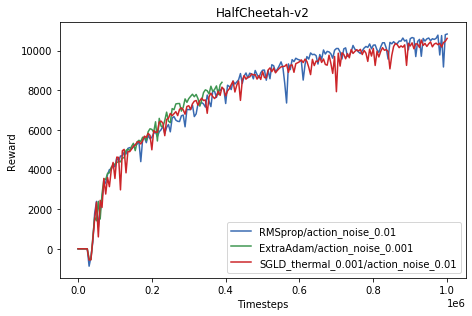

In [136]:
## Comparison One Player
HalfCheetah_exp = ['RMSprop/action_noise_0.01', 'ExtraAdam/action_noise_0.001', 'SGLD_thermal_0.001/action_noise_0.01']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

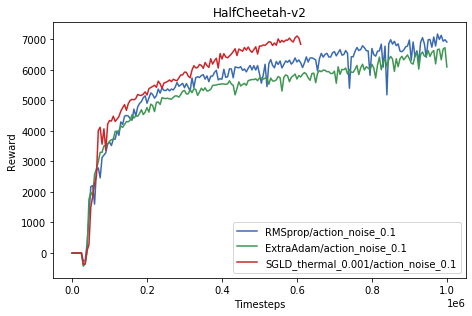

In [142]:
## Comparison Two Player
HalfCheetah_exp = ['RMSprop/action_noise_0.1', 'ExtraAdam/action_noise_0.1', 'SGLD_thermal_0.001/action_noise_0.1']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = False, best = False)

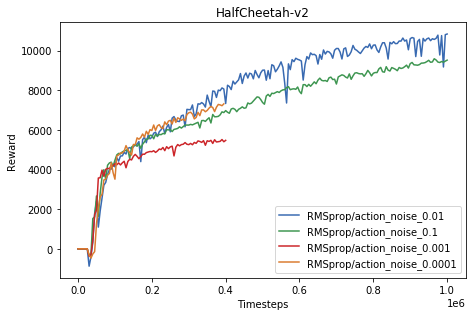

In [151]:
## Comparison Two Player 
HalfCheetah_exp = ['RMSprop/action_noise_0.01', 'RMSprop/action_noise_0.1', 'RMSprop/action_noise_0.001', 'RMSprop/action_noise_0.0001']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

No Files found


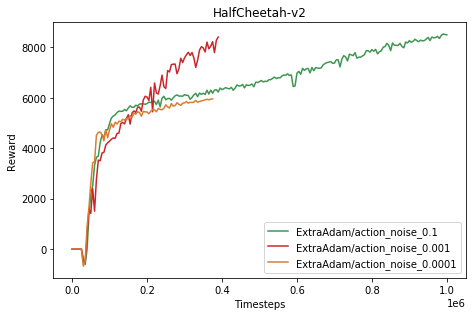

In [153]:
## Comparison Two Player 
HalfCheetah_exp = ['ExtraAdam/action_noise_0.01', 'ExtraAdam/action_noise_0.1', 'ExtraAdam/action_noise_0.001', 'ExtraAdam/action_noise_0.0001']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

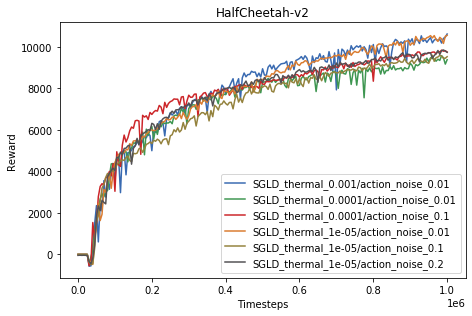

In [128]:
## Comparison Two Player Average
HalfCheetah_exp = ['SGLD_thermal_0.001/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.1',\
                  'SGLD_thermal_1e-05/action_noise_0.01', 'SGLD_thermal_1e-05/action_noise_0.1', 'SGLD_thermal_1e-05/action_noise_0.2']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

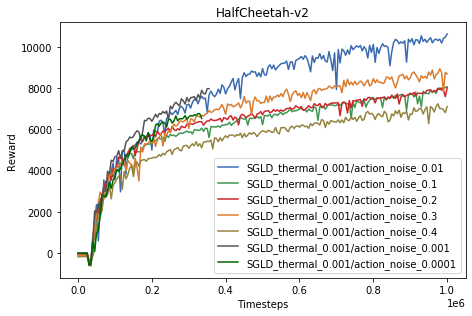

In [146]:
## Comparison Two Player Average
HalfCheetah_exp = ['SGLD_thermal_0.001/action_noise_0.01', 'SGLD_thermal_0.001/action_noise_0.1', 'SGLD_thermal_0.001/action_noise_0.2',\
                  'SGLD_thermal_0.001/action_noise_0.3', 'SGLD_thermal_0.001/action_noise_0.4', 'SGLD_thermal_0.001/action_noise_0.001',\
                  'SGLD_thermal_0.001/action_noise_0.0001']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

No Files found
No Files found


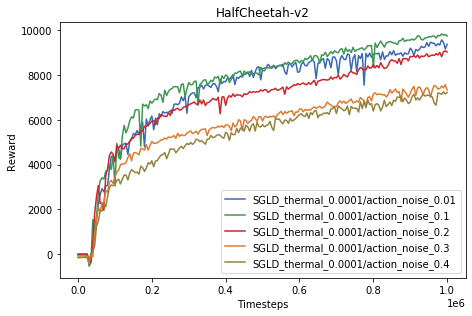

In [145]:
## Comparison Two Player Average
HalfCheetah_exp = ['SGLD_thermal_0.0001/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.1', 'SGLD_thermal_0.0001/action_noise_0.2',\
                  'SGLD_thermal_0.0001/action_noise_0.3', 'SGLD_thermal_0.0001/action_noise_0.4', 'SGLD_thermal_0.0001/action_noise_0.001',\
                  'SGLD_thermal_0.0001/action_noise_0.0001']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

No Files found


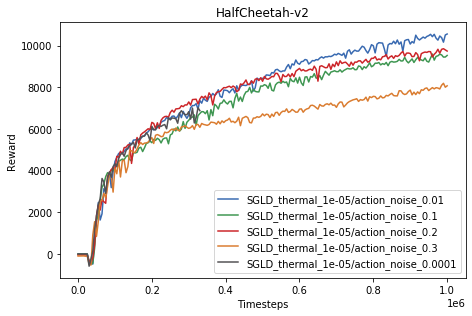

In [147]:
## Comparison Two Player Average
HalfCheetah_exp = ['SGLD_thermal_1e-05/action_noise_0.01', 'SGLD_thermal_1e-05/action_noise_0.1', 'SGLD_thermal_1e-05/action_noise_0.2',\
                  'SGLD_thermal_1e-05/action_noise_0.3', 'SGLD_thermal_1e-05/action_noise_0.4''SGLD_thermal_1e-05/action_noise_0.001',\
                  'SGLD_thermal_1e-05/action_noise_0.0001']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

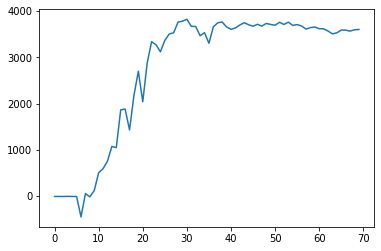

In [57]:
data = np.load("./models_TwoPlayer/HalfCheetah-v2/SGLD_thermal_0.01/action_noise_0.1/alpha_0.1/0/results.npy")
plt.plot(data)

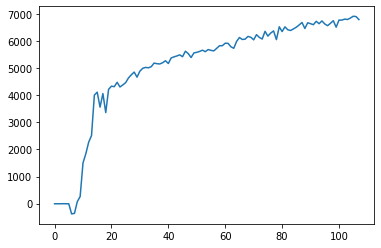

In [59]:
data = np.load("./models_TwoPlayer/HalfCheetah-v2/SGLD_thermal_0.001/action_noise_0.1/alpha_0.1/0/results.npy")
plt.plot(data)

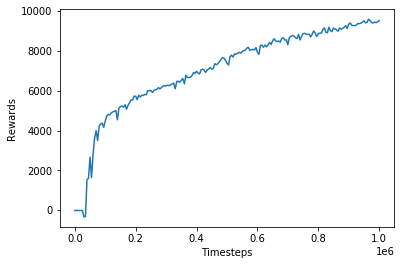

In [25]:
data = np.load("./models_OnePlayer/HalfCheetah-v2/RMSprop/action_noise_0.1/alpha_0.0/0/results.npy")
x = np.linspace(0, 1e6, 201)
x
plt.plot(x, data.tolist())
# plt.xlim(left=0, right=1e6)
plt.ylabel('Rewards')
plt.xlabel('Timesteps')
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

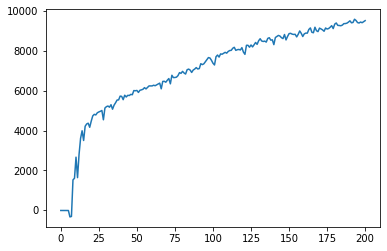

In [28]:
data = np.load("./models_OnePlayer/HalfCheetah-v2/RMSprop/action_noise_0.1/alpha_0.0/0/results.npy")
plt.plot(data)

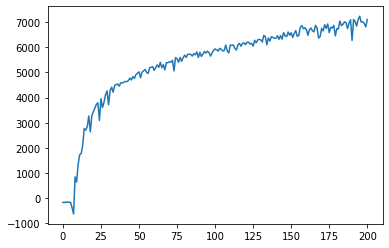

In [35]:
data = np.load("./models_OnePlayer/HalfCheetah-v2/SGLD_thermal_0.001/action_noise_0.4/alpha_0.0/0/results.npy")
plt.plot(data)

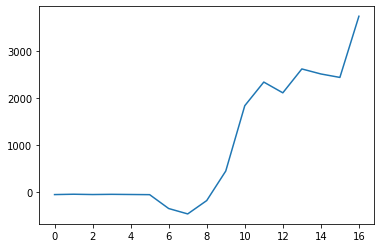

In [55]:
data = np.load("./models_OnePlayer/HalfCheetah-v2/SGLD_thermal_1e-05/action_noise_0.2/alpha_0.0/0/results.npy")
plt.plot(data)